# TABLES DES MATIERES

1. [IMPORTATION DES DONNEES](#IMP)<br>
2. [NETTOYAGE DES DONNEES](#NT)<br>
2. [REGRESSION](#REG)<br> 
3. [REGRESSION MULTIPLE ](#REGM)<br> 
4. [ANOVA1](#AN1)<br> 
5. [ANOVA2](#AN2)<br> 
6. [ACP ](#ACP)<br> 
7. [AFC ](#AFC)<br> 
8. [ACM ](#ACM)<br> 
    A. [ACM2 ](#ACM2)<br> 
    B. [ACM3 ](#ACM3)<br> 
9. [CLASSIFICATION](#CLF)<br> 
    13. [K MEANS](#KM)<br> 
    12. [CAH](#CAH)<br>
10. [CART](#CART)<br> 
    15. [CLASSIFICATION TREE + ARBRE OPTIMAL](#CLFT)<br> 
    15. [REGRESSION TREE + ARBRE OPTIMAL](#RGT)<br> 




<a id="IMP"></a>
# IMPORTATION DES DONNEES COMPLETES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données depuis le fichier Excel
df = pd.read_excel('HR_DATA_APP.xlsx', sheet_name='HR Data')

<a id="NT"></a>
# NETTOYAGE DES DONNEES

# NETTOYAGE DE NULL DE YearsWithCurrManager

In [ ]:
Y = df['YearsWithCurrManager']

MEAN = Y.mean()
MEAN
Y.fillna(round( MEAN ) , inplace = True )
Y

<a id="REG"></a>
# REGRESSION

### REGRESSION SIMPLE SUR : JobLevel & MonthlyIncome

In [246]:
import seaborn as sns

df_REG = df[['JobLevel' , 'MonthlyIncome' ]]
X_REG = df_REG["JobLevel"]
y_REG = df["MonthlyIncome"]
df_REG


,JobLevel,MonthlyIncome
0,1,2090
1,1,1232
2,3,13245
3,1,2322
4,1,2871
...,...,...
1366,3,8865
1367,3,10938
1368,2,5067
1369,3,8823


Correlation : 
               JobLevel  MonthlyIncome
JobLevel       1.000000       0.936081
MonthlyIncome  0.936081       1.000000


C:\Users\ZT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

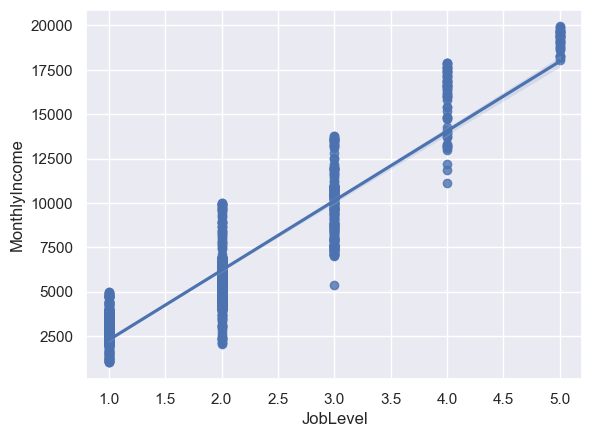

In [248]:
print("Correlation : ")
print(df_REG.corr())

sns.regplot(X_REG, y_REG) 

In [251]:
X_REG = sm.add_constant(X_REG)
model = sm.OLS(y_REG,X_REG).fit() #moindre caree ordinaire
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     9693.
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        16:24:07   Log-Likelihood:                -11917.
No. Observations:                1371   AIC:                         2.384e+04
Df Residuals:                    1369   BIC:                         2.385e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1644.4814     85.978    -19.127      0.0

<a id="REGM"></a>
## REGRESSION MULTIPLE SUR :  YearsInCurrentRole-YearsWithCurrManager  & YearsAtCompany

In [252]:
import seaborn as sns

df_REG_M = df[['YearsInCurrentRole' , 'YearsWithCurrManager', 'YearsAtCompany' ]]
X_REG_M = df_REG_M[['YearsInCurrentRole' , 'YearsWithCurrManager']]
y_REG_M = df["YearsAtCompany"]
df_REG_M


,YearsInCurrentRole,YearsWithCurrManager,YearsAtCompany
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1366,7,8,19
1367,6,8,19
1368,10,7,19
1369,9,9,19


In [254]:
print("Correlation : ")
print(df_REG_M.corr())

Correlation : 
                      YearsInCurrentRole  YearsWithCurrManager  YearsAtCompany
YearsInCurrentRole              1.000000              0.739693        0.865413
YearsWithCurrManager            0.739693              1.000000        0.840705
YearsAtCompany                  0.865413              0.840705        1.000000


In [255]:
X_REG_M = sm.add_constant(X_REG_M)
# Create a fitted model
lm = sm.OLS(y_REG_M , X_REG_M).fit()

# Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         YearsAtCompany   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3532.
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        16:38:47   Log-Likelihood:                -2630.2
No. Observations:                1371   AIC:                             5266.
Df Residuals:                    1368   BIC:                             5282.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1607 

<a id="AN1"></a>
# ANOVA1

In [74]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

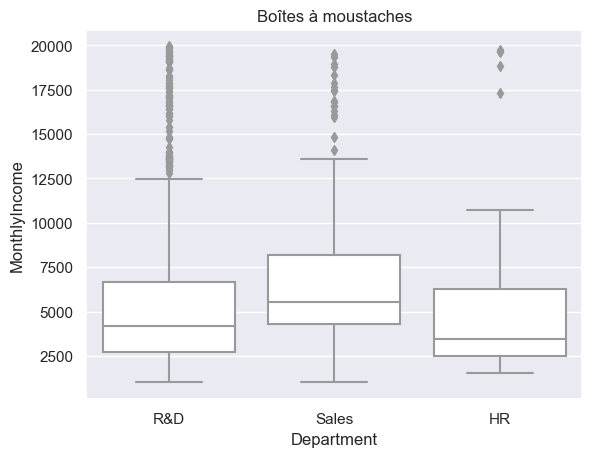

,df,sum_sq,mean_sq,F,PR(>F)
Department,2.0,1.540304e+08,7.701518e+07,4.611935,0.010088
Residual,1368.0,2.284437e+10,1.669910e+07,NaN,NaN


In [50]:
sns.set()

ax = sns.boxplot(x="Department", y="MonthlyIncome", data=df, color='white')
plt.xlabel('Department')
plt.ylabel('MonthlyIncome')
plt.title('Boîtes à moustaches')
plt.show()

anova = smf.ols('MonthlyIncome~Department', data=df).fit()
sm.stats.anova_lm(anova)

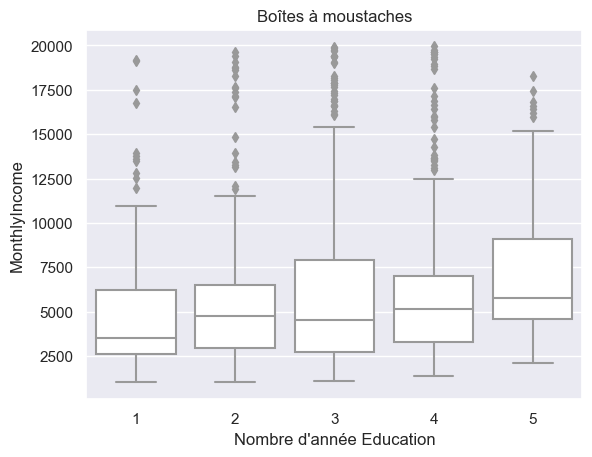

,df,sum_sq,mean_sq,F,PR(>F)
Education,1.0,2.950438e+08,2.950438e+08,17.790977,0.000026
Residual,1369.0,2.270336e+10,1.658390e+07,NaN,NaN


In [76]:
sns.set()

ax = sns.boxplot(x="Education", y="MonthlyIncome", data=df, color='white')
plt.xlabel('Nombre d\'année Education')
plt.ylabel('MonthlyIncome')
plt.title('Boîtes à moustaches')
plt.show()

anova = smf.ols('MonthlyIncome~Education', data=df).fit()
sm.stats.anova_lm(anova)

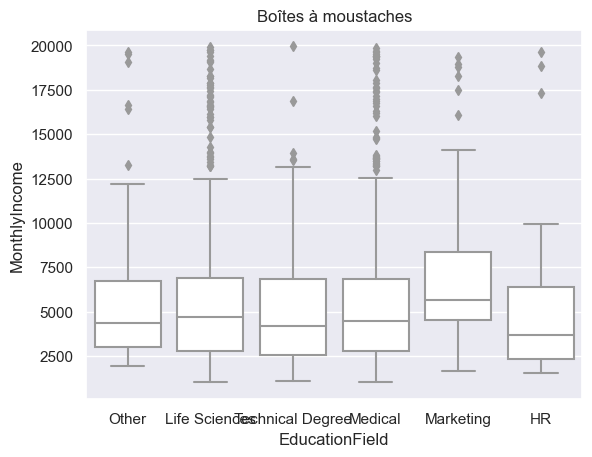

,df,sum_sq,mean_sq,F,PR(>F)
EducationField,5.0,1.104156e+08,2.208311e+07,1.316999,0.254099
Residual,1365.0,2.288799e+10,1.676776e+07,NaN,NaN


In [52]:
sns.set()

ax = sns.boxplot(x="EducationField", y="MonthlyIncome", data=df, color='white')
plt.xlabel('EducationField')
plt.ylabel('MonthlyIncome')
plt.title('Boîtes à moustaches')
#plt.figure(figsize=(30,22))

plt.show()
anova = smf.ols('MonthlyIncome~EducationField', data=df).fit()
sm.stats.anova_lm(anova)

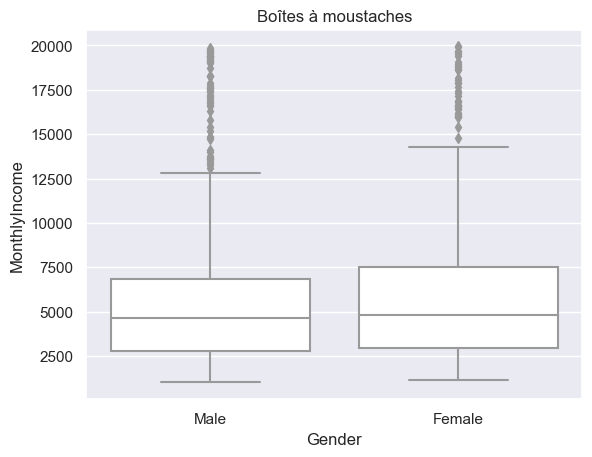

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,6.662702e+07,6.662702e+07,3.977554,0.046308
Residual,1369.0,2.293178e+10,1.675075e+07,NaN,NaN


In [53]:
sns.set()

ax = sns.boxplot(x="Gender", y="MonthlyIncome", data=df, color='white')
plt.xlabel('Gender')
plt.ylabel('MonthlyIncome')
plt.title('Boîtes à moustaches')
#plt.figure(figsize=(30,22))

plt.show()
anova = smf.ols('MonthlyIncome~Gender', data=df).fit()
sm.stats.anova_lm(anova)

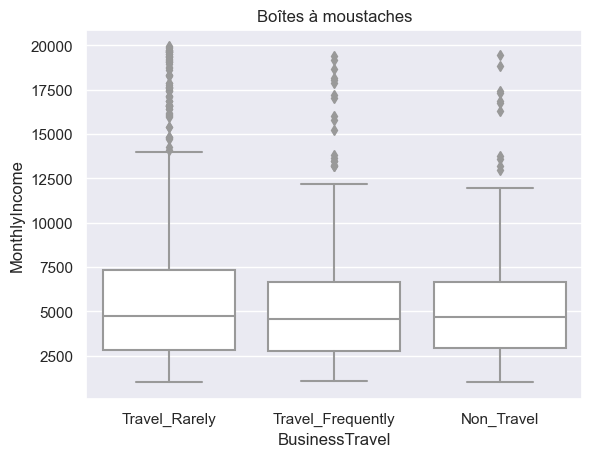

,df,sum_sq,mean_sq,F,PR(>F)
BusinessTravel,2.0,2.526641e+07,1.263320e+07,0.75228,0.471486
Residual,1368.0,2.297314e+10,1.679323e+07,NaN,NaN


In [56]:
sns.set()

ax = sns.boxplot(x="BusinessTravel", y="MonthlyIncome", data=df, color='white')
plt.xlabel('BusinessTravel')
plt.ylabel('MonthlyIncome')
plt.title('Boîtes à moustaches')
plt.show()

anova = smf.ols('MonthlyIncome~BusinessTravel', data=df).fit()
sm.stats.anova_lm(anova)

<a id="AN2"></a>
# ANOVA2

In [57]:
#SANS INTERACTION
anova2 = smf.ols('MonthlyIncome~Education+EducationField', data=df).fit()
sm.stats.anova_lm(anova2)

,df,sum_sq,mean_sq,F,PR(>F)
EducationField,5.0,1.104156e+08,2.208311e+07,1.331988,0.247914
Education,1.0,2.741394e+08,2.741394e+08,16.535270,0.000050
Residual,1364.0,2.261385e+10,1.657907e+07,NaN,NaN


In [58]:
#AVEC INTERACTION
anova2 = smf.ols('MonthlyIncome~Education*EducationField', data=df).fit()
sm.stats.anova_lm(anova2)

,df,sum_sq,mean_sq,F,PR(>F)
EducationField,5.0,1.104156e+08,2.208311e+07,1.333656,0.247235
Education,1.0,2.741394e+08,2.741394e+08,16.555986,0.000050
Education:EducationField,5.0,1.110870e+08,2.221740e+07,1.341766,0.243948
Residual,1359.0,2.250276e+10,1.655832e+07,NaN,NaN


<a id="ACP"></a>
# ACP

In [101]:
#Suppression de la colonne 
SUPP = ['Attrition(Exit or Not)','BusinessTravel','Department','Education','EducationField','EmployeeNumber(id)','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobLevel','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']
df_ACP = df.drop(SUPP , axis = 1)
df_ACP

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike(%aug salaire ),TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
0,37,1373,2,92,2090,6,15,7,0,0
1,21,391,15,96,1232,1,14,0,0,0
2,45,193,6,52,13245,4,14,17,0,0
3,23,541,2,62,2322,3,13,3,0,0
4,22,534,15,59,2871,1,15,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1366,45,1052,6,57,8865,6,12,23,19,7
1367,39,505,2,64,10938,0,25,20,19,6
1368,47,1379,16,64,5067,1,19,20,19,10
1369,38,330,17,65,8823,0,18,20,19,9


In [102]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation : CREER L'OBJET POUR ACCES A LA METHODE
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df_ACP) # Z EST CENTRE REDUIT 

#Matrice de nuage
#pd.plotting.scatter_matrix(df)

#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA() #LE CONSTRUCTEUR 

#Coordonées dans le nouvel espace
coord = acp.fit_transform(Z)
import matplotlib.pyplot as plt
#print(coord)
acp.explained_variance_ratio_

array([0.28063503, 0.16422756, 0.10619196, 0.10156009, 0.09994492,
       0.09179559, 0.07126788, 0.05181812, 0.01992205, 0.01263679])

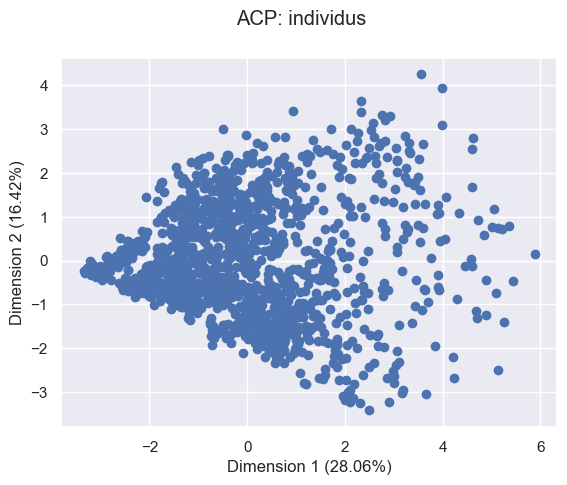

In [103]:
# plotting scatter plot
import numpy as np
plt.scatter(coord[:,0],coord[:,1])

#pourcentage des axes
pr1=acp.explained_variance_ratio_[0]/np.sum(acp.explained_variance_ratio_)
pr1=round(pr1*100,2)
pr2=acp.explained_variance_ratio_[1]/np.sum(acp.explained_variance_ratio_)
pr2=round(pr2*100,2)


# Loop for annotation of all points
#for i in range(len(coord)):
    #plt.annotate(df_ACP.index[i],(coord[i,0],coord[i,1] + 0.1))
plt.xlabel("Dimension 1 ({}%)".format(pr1)) # modification du nom de l'axe X
plt.ylabel("Dimension 2 ({}%)".format(pr2)) # idem pour axe Y
plt.suptitle("ACP: individus") # titre général
plt.show()



In [104]:
#contributions aux axes 

ctr = coord**2
for j in range(8):
    ctr[:,j] = ctr[:,j]/np.sum(ctr[:,j])

df_ctr_cp1cp2 = pd.DataFrame({'id':df_ACP.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
df_ctr_cp1cp2

,id,CTR_1,CTR_2
0,0,0.000520,0.001734
1,1,0.002635,0.000003
2,2,0.000145,0.002468
3,3,0.001748,0.000119
4,4,0.002120,0.000001
...,...,...,...
1366,1366,0.003409,0.000187
1367,1367,0.002039,0.001711
1368,1368,0.002506,0.002380
1369,1369,0.002115,0.003173


In [106]:
acp.explained_variance_

array([2.80839873, 1.64347436, 1.06269477, 1.01634217, 1.00017873,
       0.91862595, 0.71319899, 0.51855948, 0.19936594, 0.12646013])

In [107]:
#!pip install mlxtend
from mlxtend.plotting import plot_pca_correlation_graph

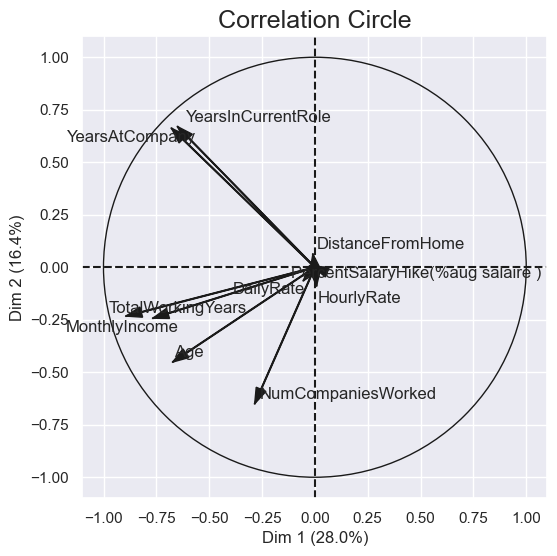

In [108]:
figure, correlation_matrix = plot_pca_correlation_graph(Z, 
                                                        df_ACP.columns.values,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=6)

<a id="AFC"></a>
# AFC

In [74]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np
import matplotlib.pyplot as plt
AFC1 = pd.read_excel("HR_DATA_APP.xlsx", sheet_name="AFC1")
AFC1

,Count of JobSatisfaction,Female,Male
0,1,112,157
1,2,110,148
2,3,168,242
3,4,158,276


In [75]:
AFC1=AFC1.set_index("Count of JobSatisfaction")
AFC1

,Female,Male
Count of JobSatisfaction,,
1,112,157
2,110,148
3,168,242
4,158,276


In [76]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2



chi2_stat, p_val, dof, expected = chi2_contingency(AFC1)

# Afficher les résultats
print("Statistique du test chi-deux :", chi2_stat)

print("Degrés de liberté :", dof)

alpha = 0.05
valeur_critique = chi2.ppf(1 - alpha, dof)

if chi2_stat>valeur_critique :
    print("On rejette l'hypothèse H0 : Les deux variables sont indépendantes l'une de l'autre.")
else :
    print("Les deux variables sont indépendantes.")
print(" ") 
print("Valeur-p :", p_val)

Statistique du test chi-deux : 3.5460304125164828
Degrés de liberté : 3
Les deux variables sont indépendantes.
 
Valeur-p : 0.3148410189604289


In [123]:
# On crée une instale de la classe CA en passant les étiquettes de lignes et les colonnes
afc=CA(row_labels=AFC1.index.values, col_labels=AFC1.columns.values, stats=True)
afc.fit(AFC1.values)

CA(col_labels=array(['Female', 'Male'], dtype=object),
   row_labels=array([1, 2, 3, 4], dtype=int64))

In [124]:
#afc.plot_coordinates(figsize=(10, 8), x_component=0, y_component=1)
#afc.plot_col_contrib(1)

In [127]:
#fig, ax = plt.subplots(figsize=(10, 8))
#afc.plot( x_component=0, y_component=1, show_row_labels=False, show_col_labels=False)
afc.row_coord_

array([[-0.03398802],
       [-0.05440233],
       [-0.0205126 ],
       [ 0.07278513]])

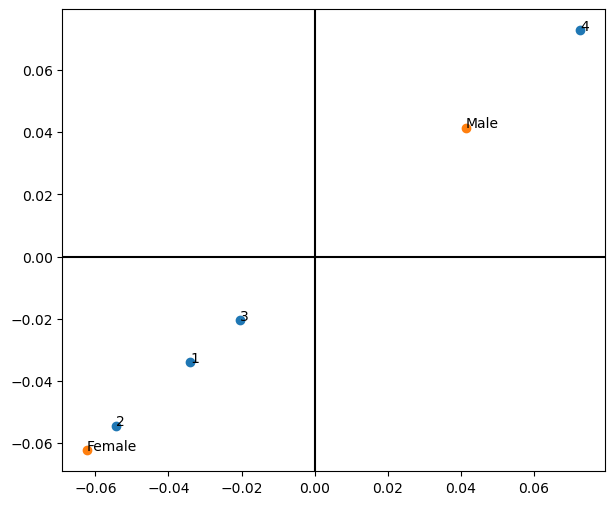

In [138]:
#afc.mapping(0, 1, figsize=(10, 8))
#afc.mapping(num_x_axis=0 , num_y_axis = 1 )
# Extraire les coordonnées des lignes et des colonnes
row_coords = afc.row_coord_
col_coords = afc.col_coord_

# Extraire les variances expliquées par chaque dimension
eigenvalues = afc.eig_
total_variance = sum(eigenvalues)
var_explained = [eigenvalue / total_variance for eigenvalue in eigenvalues]

# Créer le biplot
fig, ax = plt.subplots(figsize=(7, 6))

# Tracer les coordonnées des lignes
ax.scatter(row_coords[:, 0], row_coords[:, 0], label='Rows')
for i, (x, y) in enumerate(zip(row_coords[:, 0], row_coords[:, 0])):
    ax.text(x, y, AFC1.index.values[i])

# Tracer les coordonnées des colonnes
ax.scatter(col_coords[:, 0], col_coords[:, 0], label='Columns')
for i, (x, y) in enumerate(zip(col_coords[:, 0], col_coords[:, 0])):
    ax.text(x, y, AFC1.columns.values[i])
    
total_variance = sum(eigenvalues)
var_explained = [eigenvalue / total_variance for eigenvalue in eigenvalues]

ax.axhline(y=0, color='k')  # Axe horizontal
ax.axvline(x=0, color='k')  # Axe vertical
# Afficher le biplot
plt.show()
ax.axhline()


<a id="ACM"></a>
# ACM

<a id="ACM1"></a>
## ACM1

In [85]:
#Suppression de la colonne 
SUPP_ACM1 = [ 'Age','DailyRate','DistanceFromHome','Education','EmployeeNumber(id)','HourlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike(%aug salaire )','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
df_ACM = df.drop(SUPP_ACM1 , axis = 1)
df_ACM.head()

,Attrition(Exit or Not),BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction
0,Yes,Travel_Rarely,R&D,Other,4,Male,2,1,Laboratory Technician,3,Single,Yes,3,2
1,No,Travel_Rarely,R&D,Life Sciences,3,Male,3,1,Research Scientist,4,Single,No,3,4
2,No,Travel_Rarely,R&D,Other,4,Male,3,3,Research Director,1,Married,Yes,3,2
3,No,Travel_Rarely,Sales,Technical Degree,3,Male,3,1,Sales Representative,1,Divorced,No,3,3
4,No,Travel_Rarely,R&D,Medical,2,Female,3,1,Laboratory Technician,4,Single,No,3,3


Text(0, 0.5, 'Component 1 (6.36% inertia)')

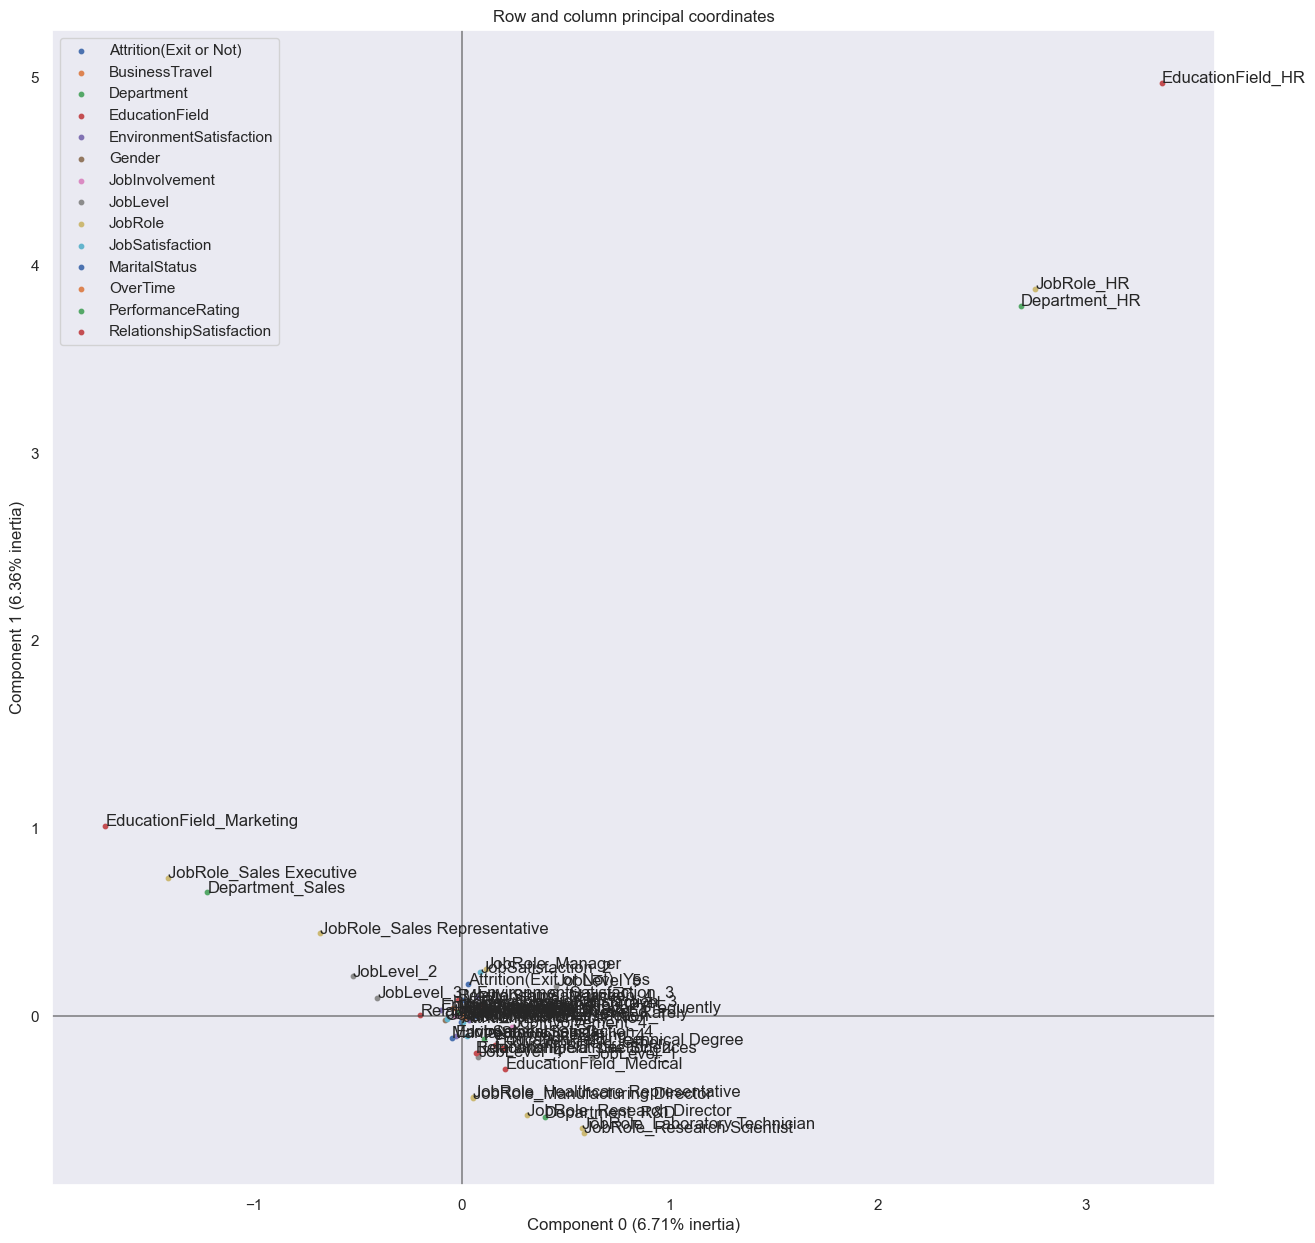

In [86]:
import prince
import matplotlib.pyplot as plt
from prince import plot 

#Création de l'objet mca
mca = prince.MCA()
#Lancement de l'ACM sur le jeu de données
mca=mca.fit(df_ACM)


# Création de la figure

fig, ax = plt.subplots(figsize=(15, 15))

#Tracage des axes
ax = plot.stylize_axis(ax)

#Affichage des profils lignes sur deux dimensions
#alpha pour la transparence 
#row_coords = mca.row_coordinates(df)
#ax.scatter(
 #   row_coords.iloc[:, 0],
  #  row_coords.iloc[:, 1],
   # s=10,
    #label=None,
    #color=plot.GRAY['dark'],
    #alpha=0.6
#)

#Profils colonnes
col_coords = mca.column_coordinates(df_ACM)
x = col_coords[0]
y = col_coords[1]

#Extraction des préfixes à l'aide map et de lambda
prefixes = col_coords.index.str.split('_').map(lambda x: x[0])

#Affichage des profils colonnes avec leurs modalités
for prefix in prefixes.unique():
    mask = prefixes == prefix
    
    ax.scatter(x[mask], y[mask], s=10, label=prefix)

    for i, label in enumerate(col_coords[mask].index):
        ax.annotate(label, (x[mask][i], y[mask][i]))

#Ajout de légende
ax.legend()
            
            

ax.set_title('Row and column principal coordinates')
ei = [eig / mca.total_inertia_ for eig in mca.eigenvalues_]
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(0, 100 * ei[0]))
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(1, 100 * ei[1]))


<a id="ACM2"></a>
## ACM 2

In [92]:
#Suppression de la colonne 
SUPP_ACM2 = [ 'Department', 'EducationField',  'EnvironmentSatisfaction' ,'RelationshipSatisfaction'   ,'Age','DailyRate','DistanceFromHome','Education','EmployeeNumber(id)','HourlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike(%aug salaire )','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
df_ACM = df.drop(SUPP_ACM2 , axis = 1)
df_ACM.head()

,Attrition(Exit or Not),BusinessTravel,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating
0,Yes,Travel_Rarely,Male,2,1,Laboratory Technician,3,Single,Yes,3
1,No,Travel_Rarely,Male,3,1,Research Scientist,4,Single,No,3
2,No,Travel_Rarely,Male,3,3,Research Director,1,Married,Yes,3
3,No,Travel_Rarely,Male,3,1,Sales Representative,1,Divorced,No,3
4,No,Travel_Rarely,Female,3,1,Laboratory Technician,4,Single,No,3


Text(0, 0.5, 'Component 1 (6.67% inertia)')

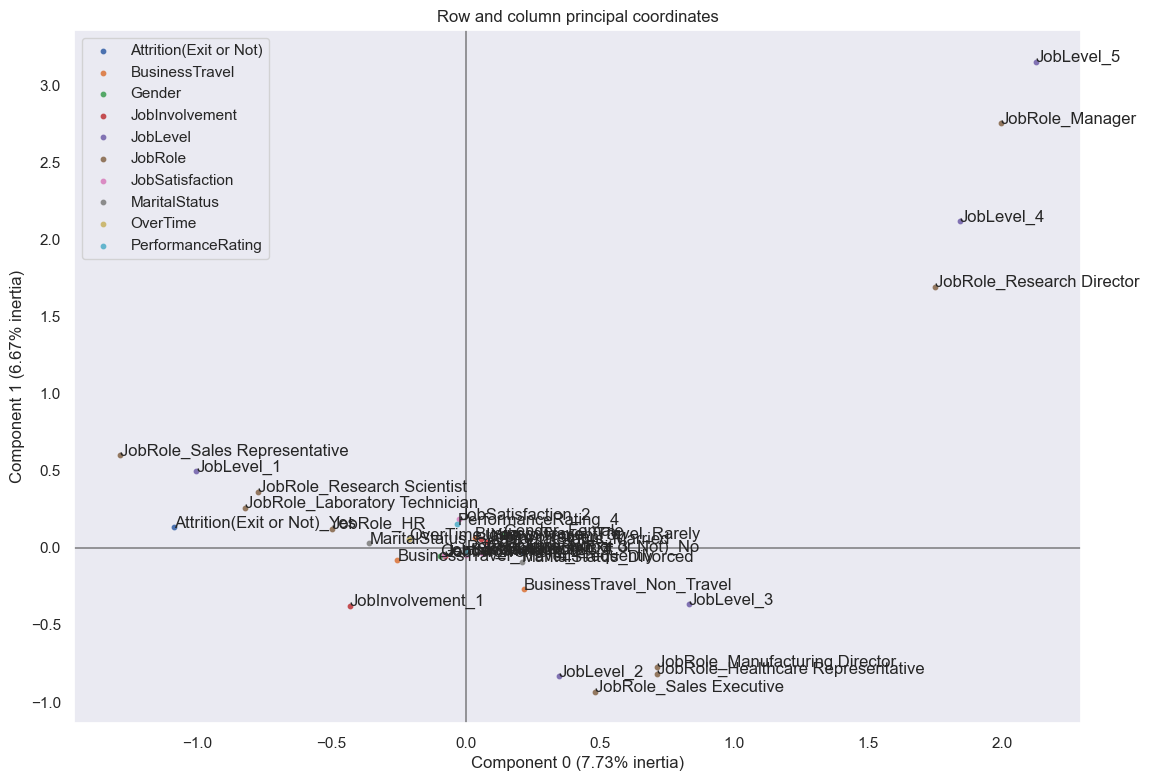

In [94]:
#Création de l'objet mca
mca = prince.MCA()
#Lancement de l'ACM sur le jeu de données
mca=mca.fit(df_ACM)

import prince
import matplotlib.pyplot as plt
from prince import plot 
# Création de la figure

fig, ax = plt.subplots(figsize=(13, 9))

#Tracage des axes
ax = plot.stylize_axis(ax)

#Affichage des profils lignes sur deux dimensions
#alpha pour la transparence 
#row_coords = mca.row_coordinates(df)
#ax.scatter(
 #   row_coords.iloc[:, 0],
  #  row_coords.iloc[:, 1],
   # s=10,
    #label=None,
    #color=plot.GRAY['dark'],
    #alpha=0.6
#)

#Profils colonnes
col_coords = mca.column_coordinates(df_ACM)
x = col_coords[0]
y = col_coords[1]

#Extraction des préfixes à l'aide map et de lambda
prefixes = col_coords.index.str.split('_').map(lambda x: x[0])

#Affichage des profils colonnes avec leurs modalités
for prefix in prefixes.unique():
    mask = prefixes == prefix
    
    ax.scatter(x[mask], y[mask], s=10, label=prefix)

    for i, label in enumerate(col_coords[mask].index):
        ax.annotate(label, (x[mask][i], y[mask][i]))

#Ajout de légende
ax.legend()
            
            

ax.set_title('Row and column principal coordinates')
ei = [eig / mca.total_inertia_ for eig in mca.eigenvalues_]
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(0, 100 * ei[0]))
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(1, 100 * ei[1]))


<a id="ACM3"></a>
# ACM3

In [89]:
#Suppression de la colonne 
SUPP_ACM3 = [ 'JobRole','JobLevel','Department', 'EducationField',  'EnvironmentSatisfaction' ,'RelationshipSatisfaction'   ,'Age','DailyRate','DistanceFromHome','Education','EmployeeNumber(id)','HourlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike(%aug salaire )','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
df_ACM = df.drop(SUPP_ACM3 , axis = 1)
df_ACM.head()

,Attrition(Exit or Not),BusinessTravel,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating
0,Yes,Travel_Rarely,Male,2,3,Single,Yes,3
1,No,Travel_Rarely,Male,3,4,Single,No,3
2,No,Travel_Rarely,Male,3,1,Married,Yes,3
3,No,Travel_Rarely,Male,3,1,Divorced,No,3
4,No,Travel_Rarely,Female,3,4,Single,No,3


Text(0, 0.5, 'Component 1 (8.33% inertia)')

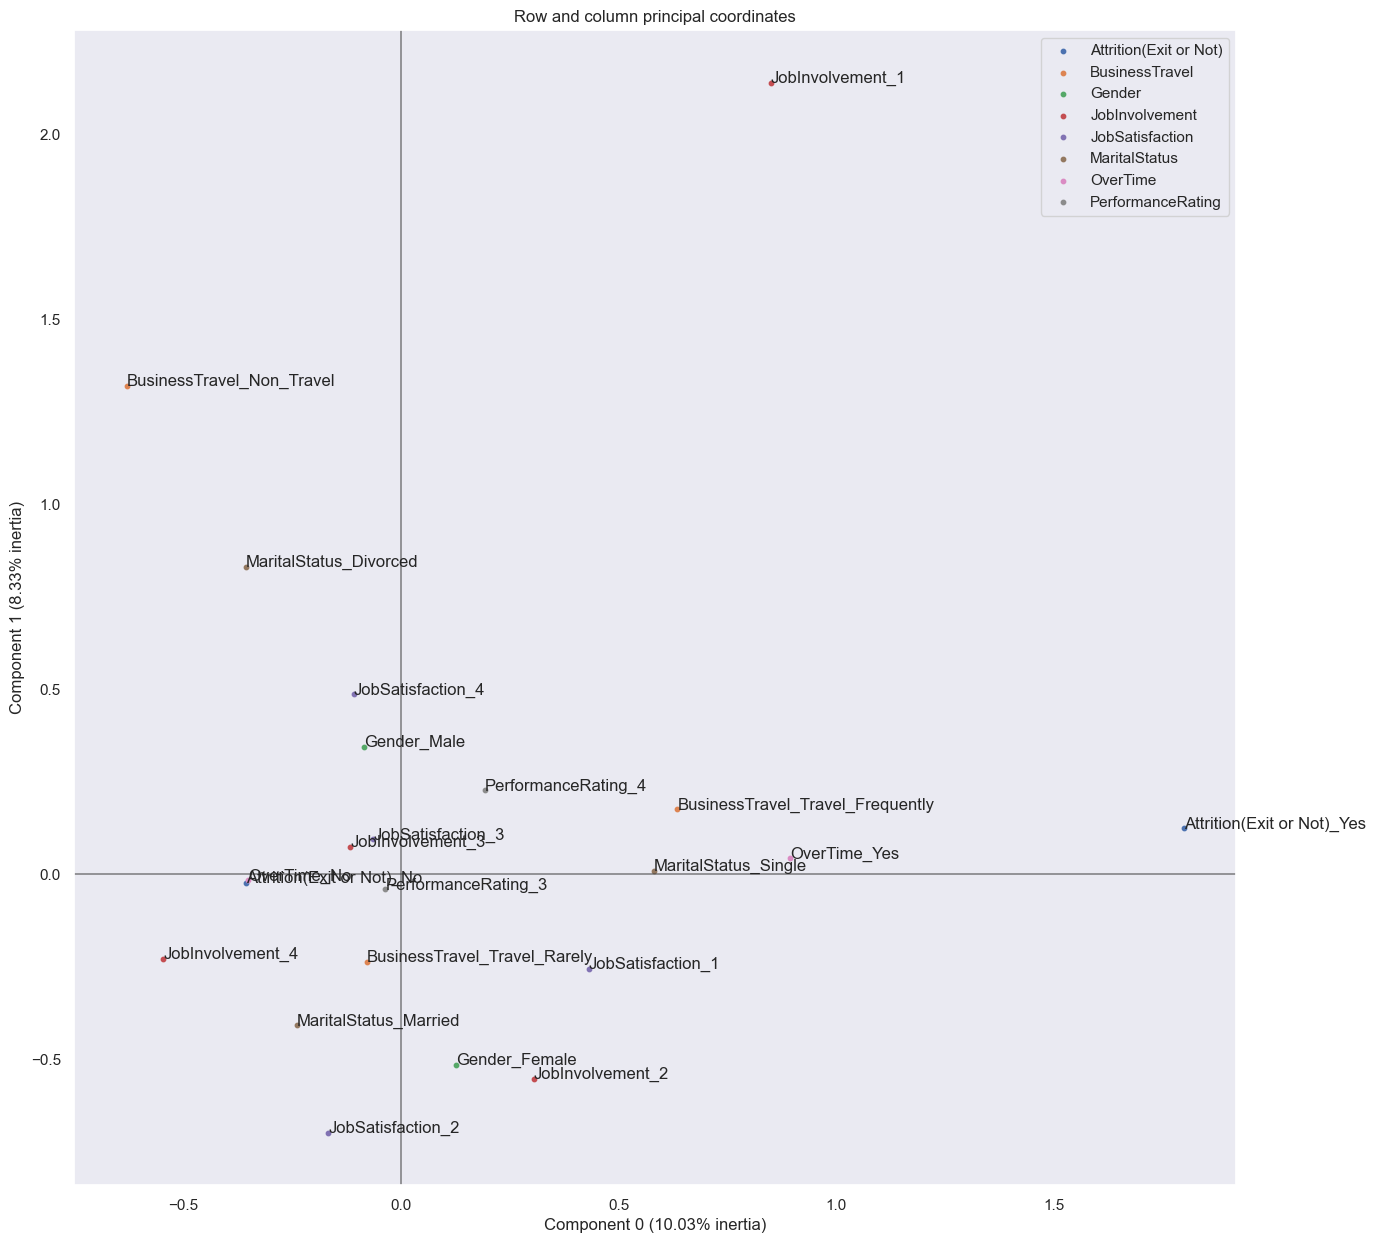

In [90]:
#Création de l'objet mca
mca = prince.MCA()
#Lancement de l'ACM sur le jeu de données
mca=mca.fit(df_ACM)

import prince
import matplotlib.pyplot as plt
from prince import plot 
# Création de la figure

fig, ax = plt.subplots(figsize=(15, 15))

#Tracage des axes
ax = plot.stylize_axis(ax)

#Affichage des profils lignes sur deux dimensions
#alpha pour la transparence 
#row_coords = mca.row_coordinates(df)
#ax.scatter(
 #   row_coords.iloc[:, 0],
  #  row_coords.iloc[:, 1],
   # s=10,
    #label=None,
    #color=plot.GRAY['dark'],
    #alpha=0.6
#)

#Profils colonnes
col_coords = mca.column_coordinates(df_ACM)
x = col_coords[0]
y = col_coords[1]

#Extraction des préfixes à l'aide map et de lambda
prefixes = col_coords.index.str.split('_').map(lambda x: x[0])

#Affichage des profils colonnes avec leurs modalités
for prefix in prefixes.unique():
    mask = prefixes == prefix
    
    ax.scatter(x[mask], y[mask], s=10, label=prefix)

    for i, label in enumerate(col_coords[mask].index):
        ax.annotate(label, (x[mask][i], y[mask][i]))

#Ajout de légende
ax.legend()
            
            

ax.set_title('Row and column principal coordinates')
ei = [eig / mca.total_inertia_ for eig in mca.eigenvalues_]
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(0, 100 * ei[0]))
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(1, 100 * ei[1]))


In [133]:
#Suppression de la colonne 
SUPP_ACM4 = [ 'JobInvolvement' ,'JobRole','JobLevel','Department', 'EducationField',  'EnvironmentSatisfaction' ,'RelationshipSatisfaction'   ,'Age','DailyRate','DistanceFromHome','Education','EmployeeNumber(id)','HourlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike(%aug salaire )','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
df_ACM = df.drop(SUPP_ACM4 , axis = 1)
df_ACM.head()

,Attrition(Exit or Not),BusinessTravel,Gender,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating
0,Yes,Travel_Rarely,Male,3,Single,Yes,3
1,No,Travel_Rarely,Male,4,Single,No,3
2,No,Travel_Rarely,Male,1,Married,Yes,3
3,No,Travel_Rarely,Male,1,Divorced,No,3
4,No,Travel_Rarely,Female,4,Single,No,3


Text(0, 0.5, 'Component 1 (10.02% inertia)')

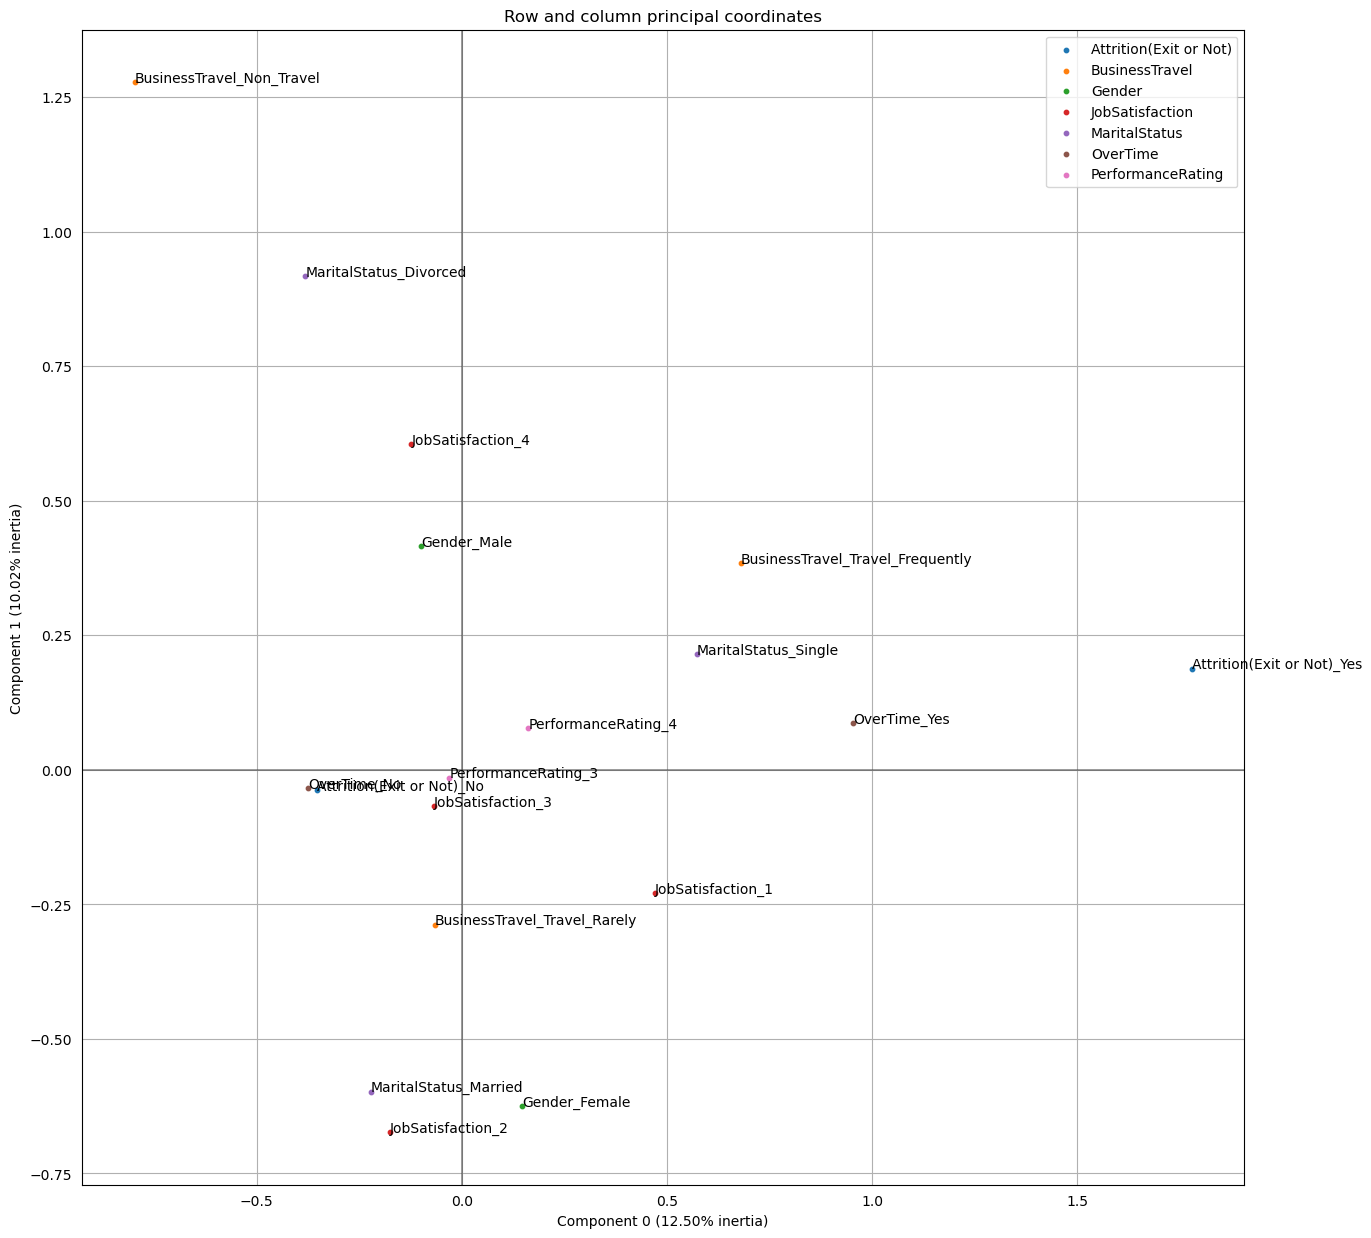

In [134]:
#Création de l'objet mca
mca = prince.MCA()
#Lancement de l'ACM sur le jeu de données
mca=mca.fit(df_ACM)

import prince
import matplotlib.pyplot as plt
from prince import plot 
# Création de la figure

fig, ax = plt.subplots(figsize=(15, 15))

#Tracage des axes
ax = plot.stylize_axis(ax)

#Affichage des profils lignes sur deux dimensions
#alpha pour la transparence 
#row_coords = mca.row_coordinates(df)
#ax.scatter(
 #   row_coords.iloc[:, 0],
  #  row_coords.iloc[:, 1],
   # s=10,
    #label=None,
    #color=plot.GRAY['dark'],
    #alpha=0.6
#)

#Profils colonnes
col_coords = mca.column_coordinates(df_ACM)
x = col_coords[0]
y = col_coords[1]

#Extraction des préfixes à l'aide map et de lambda
prefixes = col_coords.index.str.split('_').map(lambda x: x[0])

#Affichage des profils colonnes avec leurs modalités
for prefix in prefixes.unique():
    mask = prefixes == prefix
    
    ax.scatter(x[mask], y[mask], s=10, label=prefix)

    for i, label in enumerate(col_coords[mask].index):
        ax.annotate(label, (x[mask][i], y[mask][i]))

#Ajout de légende
ax.legend()
            
            

ax.set_title('Row and column principal coordinates')
ei = [eig / mca.total_inertia_ for eig in mca.eigenvalues_]
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(0, 100 * ei[0]))
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(1, 100 * ei[1]))


<a id="CLF"></a>
# CLASSIFICATION(CAH, K MEANS)

<a id="KM"></a>
## K MEANS

In [9]:
#Suppression de la colonne 
SUPP = ['Attrition(Exit or Not)','BusinessTravel','Department','Education','EducationField','EmployeeNumber(id)','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobLevel','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']
df_ACP = df.drop(SUPP , axis = 1)
df_ACP
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation : CREER L'OBJET POUR ACCES A LA METHODE
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df_ACP) # Z EST CENTRE REDUIT 

#Matrice de nuage
#pd.plotting.scatter_matrix(df)

#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA() #LE CONSTRUCTEUR 

#Coordonées dans le nouvel espace
coord = acp.fit_transform(Z)
import matplotlib.pyplot as plt
#print(coord)
acp.explained_variance_ratio_

array([0.28063503, 0.16422756, 0.10619196, 0.10156009, 0.09994492,
       0.09179559, 0.07126788, 0.05181812, 0.01992205, 0.01263679])

[[3.46839709e+01 7.98502732e+02 9.07559199e+00 6.61202186e+01
  4.18561475e+03 2.53825137e+00 1.52276867e+01 8.21129326e+00
  5.32969035e+00 3.55009107e+00]
 [4.26593407e+01 8.36912088e+02 9.61172161e+00 6.52637363e+01
  1.28076740e+04 3.47252747e+00 1.53516484e+01 1.83992674e+01
  7.68864469e+00 5.22344322e+00]]


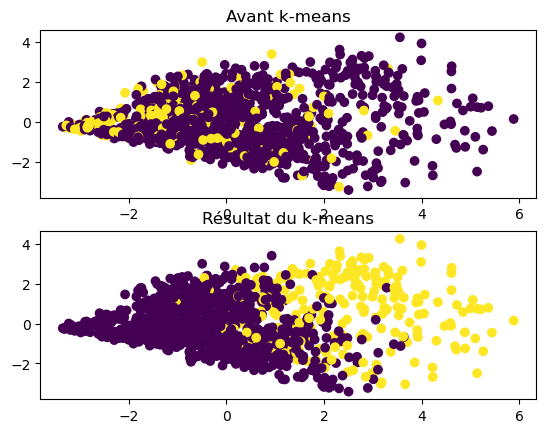

In [14]:
#Suppression de la colonne 
SUPP = ['Attrition(Exit or Not)','BusinessTravel','Department','Education','EducationField','EmployeeNumber(id)','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobLevel','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']
df_CLF = df.drop(SUPP , axis = 1)
df_CLF


from sklearn.cluster import KMeans

# Extraction de quatre premiers colonnes   #NON SUPERVISED 

observations = df_CLF 

nb_groupes = 2

kmeans = KMeans(n_clusters= nb_groupes , random_state=0).fit(observations)

# Affichage des centres

#centre en DIMENTION = 4 ,  pour 3 groupes 

print(kmeans.cluster_centers_)

# Affichage des résultats avant k-means----------------------------------------------

import matplotlib.pyplot as plt

# Utiliser les noms d'espèce pour colorier les points

df['Attrition(Exit or Not)'] = df['Attrition(Exit or Not)'].astype('category') 

# 211 : 2 lignes ( nrows ), 1 colonne ( ncols ) et le nombre de plot(c-a-d this plot is the first plot).
# 
plt.subplot(211) ; plt.title("Avant k-means")

#l'affichage des résultats avant k-means,
#en fonction des longueurs et des largeurs des sépales
# et ils sont colorés en fonction de l'espèce d'iris( species ).

plt.scatter(coord[:, 0],coord[:, 1],

          c=df['Attrition(Exit or Not)'].cat.codes ); 
#c=df['Attrition(Exit or Not)'].cat.codes
# Affichage des résultats du k-means --------------------------------------------------

plt.subplot(212) ; plt.title("Résultat du k-means")

centers = pd.DataFrame(kmeans.cluster_centers_) 

centers.columns = observations.columns ; 

# Representation par les largeurs et longueurs des sepales
plt.scatter(coord[:, 0],coord[:, 1],  c=kmeans.labels_ ) ; # ON UTILISE kmeans.labels_

#REPRESENTION DES CENTRES
#plt.scatter(centers['Age'],centers['DailyRate'], c=range(nb_groupes),s=200,marker="s")

plt.show()


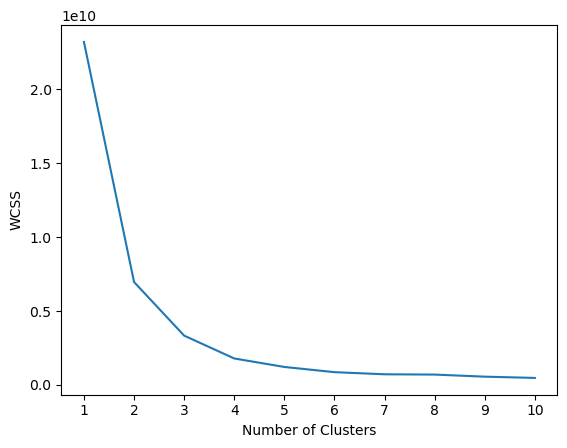

In [12]:
#create list to hold SSE values for each k
# WCSS - the sum of square distances between the centroids and each points.
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(observations)
    wcss.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), wcss) #IL CONSOMME BEAUCOUP DE MEMOIRE , DONC ON CHOISIT JUSTE 11
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

<a id="CAH"></a>
## CAH

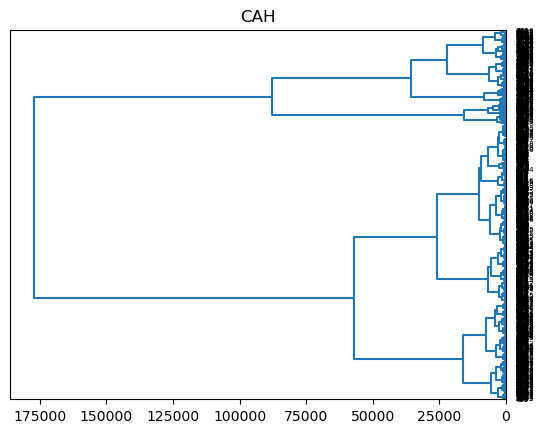

In [5]:
#Suppression de la colonne 
SUPP = ['Attrition(Exit or Not)','BusinessTravel','Department','Education','EducationField','EmployeeNumber(id)','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobLevel','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']
df_CAH = df.drop(SUPP , axis = 1)
df_CAH

from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#Matrice des distances

Z = linkage(df_CAH ,method='ward', metric='euclidean') ###

#affichage du dendrogramme

plt.title("CAH")

dendrogram(Z,labels=df_CAH.index,orientation='left', color_threshold=0)

plt.show()

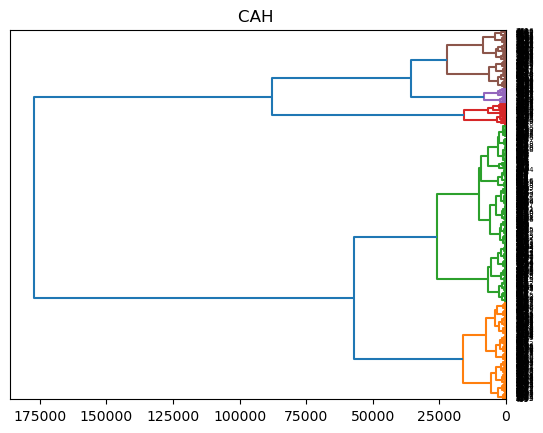

In [8]:
#matérialisation des 3 espèces (hauteur t = 30000)

plt.title('CAH ')

dendrogram(Z,labels=df_CAH.index,orientation='left',color_threshold=30000) #SEUIL FIXE POUR LES CLASSES -
# L INTERSECTION ENTRE LES  0 5 10 ET LES DROITES DES COLONNES

plt.show()


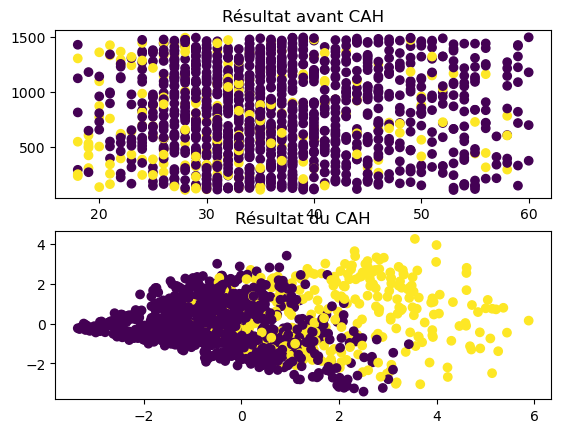

In [7]:

df['Attrition(Exit or Not)'] = df['Attrition(Exit or Not)'].astype('category') 


plt.subplot(211) ; plt.title("Résultat avant CAH")

plt.scatter(df_CAH['Age'],df_CAH['DailyRate'],

          c=df['Attrition(Exit or Not)'].cat.codes) ;

#découpage à la hauteur t = 7 : 3 groupes obtenus

groupes_cah = fcluster(Z,t=100000,criterion='distance')

# Affichage des résultats du k-means

plt.subplot(212) ; plt.title("Résultat du CAH")

plt.scatter(coord[:, 0],coord[:, 1], c=groupes_cah) ;

plt.show()

<a id="AFD"></a>
# ANALYSE DESCRIMINANTE : AFD (CLASSIFICATION)

In [107]:
from sklearn import datasets
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder

In [166]:
#Suppression de la colonne 
SUPP = ['Attrition(Exit or Not)','BusinessTravel','Department','Education','EducationField','EmployeeNumber(id)','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobLevel','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']
df_AFD = df.drop(SUPP , axis = 1)
df_AFD


#Variables...
X = df_AFD
#Variable...
#y = pd.Categorical.from_codes(iris.target, iris.target_names)
#### Y = df['Attrition(Exit or Not)']
Y = df['JobLevel']
#Ajouter...
df_AFD2 = X.join(pd.Series( Y , name='class'))
df_AFD2.head()


# On reduit le nombre pour seulement 200 valeurs pour la classe ... (pour rendre les donnees équilibrés)
# ClassNo = df_AFD2[df_AFD2['class'] == 'No' ].sample(n=100, random_state=42)
# ClassYes = df_AFD2[df_AFD2['class'] == 'Yes'].sample(n=100, random_state=42)

#On regroupe les deux dataframes
# df_AFD2 = pd.concat([ClassYes, ClassNo])
# df_AFD2.head()
#Definition des caractéristiques et la variable cible
# X = df_AFD2.iloc[:,:-1]
# Y = df_AFD2.iloc[:,-1]


,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike(%aug salaire ),TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,class
0,37,1373,2,92,2090,6,15,7,0,0,1
1,21,391,15,96,1232,1,14,0,0,0,1
2,45,193,6,52,13245,4,14,17,0,0,3
3,23,541,2,62,2322,3,13,3,0,0,1
4,22,534,15,59,2871,1,15,1,0,0,1


In [167]:
#Codage...
le = LabelEncoder()
y = le.fit_transform(df_AFD2['class']) #utilisé pour le scatter plot

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, Y) #LES VARIABLES(OU COMPOSANTES) DISCRIMINAANTES
lda.explained_variance_ratio_ #LES VALEURS PROPRES 

array([9.8231e-01, 1.3961e-02, 3.1325e-03, 5.9275e-04])

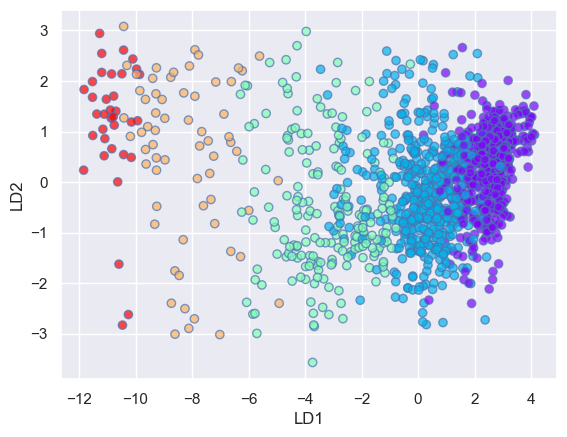

In [177]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

<a id="CART"></a>
# CART

<a id="CLFT"></a>
# CLASSIFICATION TREE 

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

In [17]:
yes_samples = df[df['Attrition(Exit or Not)'] == 'Yes'].sample(n=150, random_state=42)
no_samples = df[df['Attrition(Exit or Not)'] == 'No'].sample(n=150, random_state=42)

# Concaténer les deux échantillons
balanced_df = pd.concat([yes_samples, no_samples])

# Charger les données depuis le fichier Excel
df = pd.read_excel('HR_DATA_APP.xlsx', sheet_name='HR Data')

SUPP = [ 'MonthlyIncome', 'NumCompaniesWorked', 'YearsInCurrentRole', 'DistanceFromHome', 'Age', 'TotalWorkingYears' ,'DailyRate' ,'HourlyRate'  ,'Attrition(Exit or Not)','BusinessTravel','Department','Education','EducationField','EmployeeNumber(id)','Gender','JobInvolvement','JobRole','JobLevel','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']
df_CT = balanced_df.drop(SUPP , axis = 1)

X_clf = df_CT
#.drop(columns=['target'])  
y_clf = balanced_df['Attrition(Exit or Not)'] 
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42) #TRAIN CLF
y_clf
X_clf

,EnvironmentSatisfaction,JobSatisfaction,PercentSalaryHike(%aug salaire ),YearsAtCompany
25,3,3,12,0
595,1,1,22,5
37,1,1,20,0
480,1,4,15,4
696,3,1,13,5
...,...,...,...,...
1141,4,1,12,10
1189,2,3,17,10
797,2,4,17,6
566,2,3,12,4


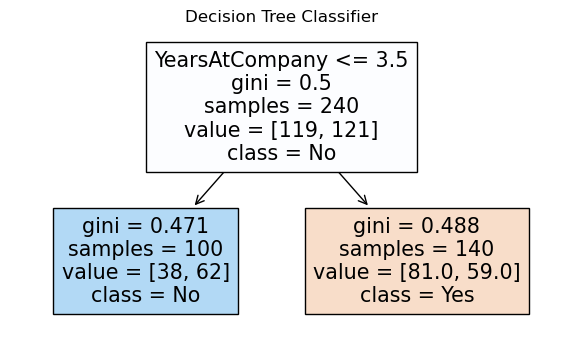

In [18]:
clf_tree = DecisionTreeClassifier(random_state=42 ,min_samples_leaf=75 ) # ON CHOISIT LE MAX DEPTH COMME COMPLEXITY
#  , min_samples_leaf=50
clf_tree.fit(X_clf_train, y_clf_train)
# Plot decision tree for classification
plt.figure(figsize=(7, 4))
plot_tree(clf_tree, filled=True, feature_names=df_CT.columns , class_names=np.array([ 'Yes','No' ]))
plt.title("Decision Tree Classifier")
plt.show()


# CLASSIFICATION OPTIMALE

In [19]:
# Define a range of hyperparameters to explore
param_range = range(1, 16)  # Example range for max_depth

# Initialize lists to store average decision cost for classification and regression
avg_decision_cost_clf = []
# avg_decision_cost_reg = []

# Loop through each hyperparameter value
for param in param_range:
    # Classification
    clf = DecisionTreeClassifier(max_depth=param, random_state=42)
    clf.fit(X_clf_train, y_clf_train)
    clf_pred = clf.predict(X_clf_test)
    avg_decision_cost_clf.append(accuracy_score(y_clf_test, clf_pred))
    

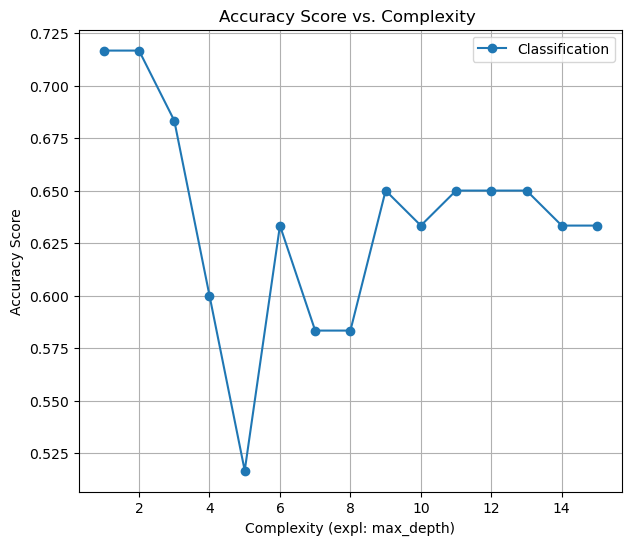

In [22]:
# Plot the graph
plt.figure(figsize=(7, 6))
plt.plot(param_range, avg_decision_cost_clf, label='Classification', marker='o')
#plt.plot(param_range, avg_decision_cost_reg, label='Regression', marker='o')
plt.xlabel('Complexity (expl: max_depth)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Complexity ')
plt.legend()
plt.grid(True)
plt.show()


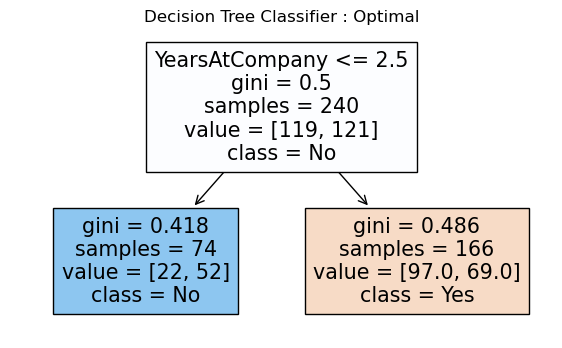

In [21]:
# Create and train decision tree classifiers
clf_tree = DecisionTreeClassifier(random_state=42, max_depth=1 ) # ON CHOISIT LE MAX DEPTH COMME COMPLEXITY
clf_tree.fit(X_clf_train, y_clf_train)
# Plot decision tree for classification
plt.figure(figsize=(7, 4))
plot_tree(clf_tree, filled=True, feature_names=df_CT.columns , class_names=np.array([ 'Yes','No' ]))
plt.title("Decision Tree Classifier : Optimal")
plt.show()

# SAMPLES : NOMBRE D'INDIVIDU
# VALUE : NOMBRE D'INDIVIDUE DANS CHAQUE CLASSE

<a id="RGT"></a>
# REGRESSION TREE

In [147]:
# DATA FOR REGRESSION
# ON CHOISIT 200 POUR CHAQUE CLASSE POUR EQUILIBRER LES DONNEES
yes_samples = df[df['Attrition(Exit or Not)'] == 'Yes'].sample(n=200, random_state=42)
no_samples = df[df['Attrition(Exit or Not)'] == 'No'].sample(n=200, random_state=42)

# Concaténer les deux échantillons
balanced_df = pd.concat([yes_samples, no_samples])

SUPP = [ 'MonthlyIncome' , 'DailyRate' , 'DistanceFromHome' , 'Attrition(Exit or Not)', 'HourlyRate' ,  'PercentSalaryHike(%aug salaire )' , 'BusinessTravel','Department','Education','EducationField','EmployeeNumber(id)','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']
df_RG = balanced_df.drop(SUPP , axis = 1)

X_reg = df_RG 
y_reg = balanced_df['MonthlyIncome'] 
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create and train decision tree regressors
reg_tree = DecisionTreeRegressor(random_state=42, min_samples_leaf=100  ) 
# in_samples_leaf : CAD MIN D INDIVIDU SUR DANS FEUILLE(ON L'AUGMENTE POUR AVOIR UN NBR MOIN DE FEUILLE)
# SI ON DIMINUE LE NOMBRE D'INDIVIDU PAR NOEUD, LA TAILLE DE L'ARBRE AUGMENTE
# ON PEUT AUSSI FIXER LE PROFONDEUR DE L'ARBRE
reg_tree.fit(X_reg_train, y_reg_train)

DecisionTreeRegressor(min_samples_leaf=100, random_state=42)

In [148]:
df_RG

,Age,JobLevel,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
25,18,1,1,0,0,0
595,32,1,7,10,5,4
37,33,3,2,11,0,0
480,51,3,2,18,4,2
696,39,1,0,6,5,2
...,...,...,...,...,...,...
760,38,1,2,10,5,2
1296,41,2,7,16,14,3
476,59,2,7,20,4,3
840,33,2,1,7,6,5


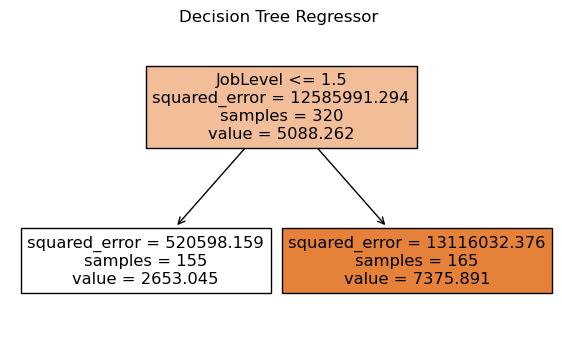

In [150]:
#REGRESSION 
# Plot decision tree for regression
plt.figure(figsize=(7, 4))
plot_tree(reg_tree, filled=True, feature_names=df_RG.columns)
plt.title("Decision Tree Regressor ")
plt.show()
 

In [151]:
# Define a range of hyperparameters to explore
param_range = range(1, 10)  # Example range for max_depth

# Initialize lists to store average decision cost for classification and regression
avg_decision_cost_reg = []

# Loop through each hyperparameter value
for param in param_range:
    # Regression
    reg = DecisionTreeRegressor(max_depth=param, random_state=40)
    reg.fit(X_reg_train, y_reg_train)
    reg_pred = reg.predict(X_reg_test)
    avg_decision_cost_reg.append(mean_squared_error(y_reg_test, reg_pred))

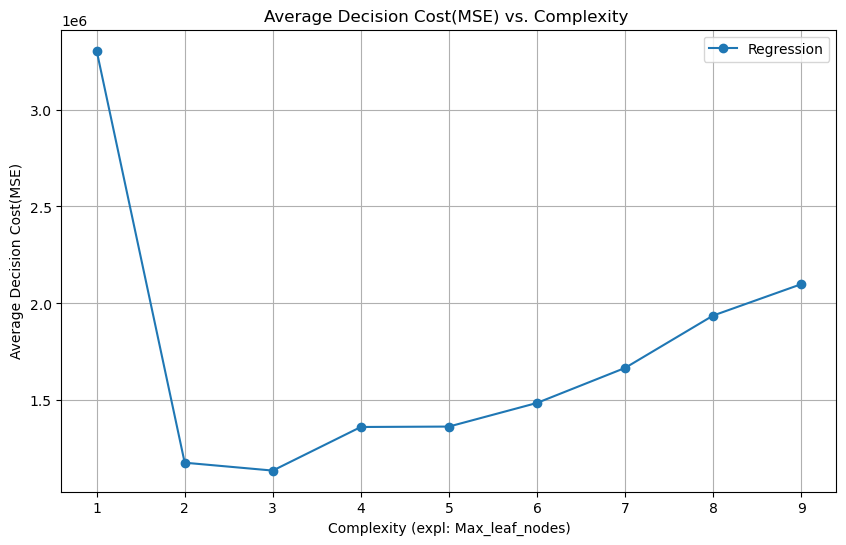

In [152]:
# Plot the graph
plt.figure(figsize=(10, 6))
#plt.plot(param_range, avg_decision_cost_clf, label='Classification', marker='o')
plt.plot(param_range, avg_decision_cost_reg, label='Regression', marker='o')
plt.xlabel('Complexity (expl: Max_leaf_nodes)')
plt.ylabel('Average Decision Cost(MSE)')
plt.title('Average Decision Cost(MSE) vs. Complexity ')
plt.legend()
plt.grid(True)
plt.show()


# REGRESSION OPTIMALE

In [153]:
# DATA FOR REGRESSION 
SUPP = [ 'MonthlyIncome' , 'DailyRate' , 'DistanceFromHome' , 'Attrition(Exit or Not)', 'HourlyRate' ,  'PercentSalaryHike(%aug salaire )' , 'BusinessTravel','Department','Education','EducationField','EmployeeNumber(id)','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']
df_RG = balanced_df.drop(SUPP , axis = 1)

X_reg = df_RG 
y_reg = balanced_df['MonthlyIncome'] 
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

# Create and train decision tree regressors
reg_tree = DecisionTreeRegressor(random_state=0, max_leaf_nodes=3) 
# in_samples_leaf : CAD MIN D INDIVIDU SUR DANS FEUILLE(ON L'AUGMENTE POUR AVOIR UN NBR MOIN DE FEUILLE)
# SI ON DIMINUE LE NOMBRE D'INDIVIDU PAR NOEUD, LA TAILLE DE L'ARBRE AUGMENTE
# ON PEUT AUSSI FIXER LE PROFONDEUR DE L'ARBRE
reg_tree.fit(X_reg_train, y_reg_train)


DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

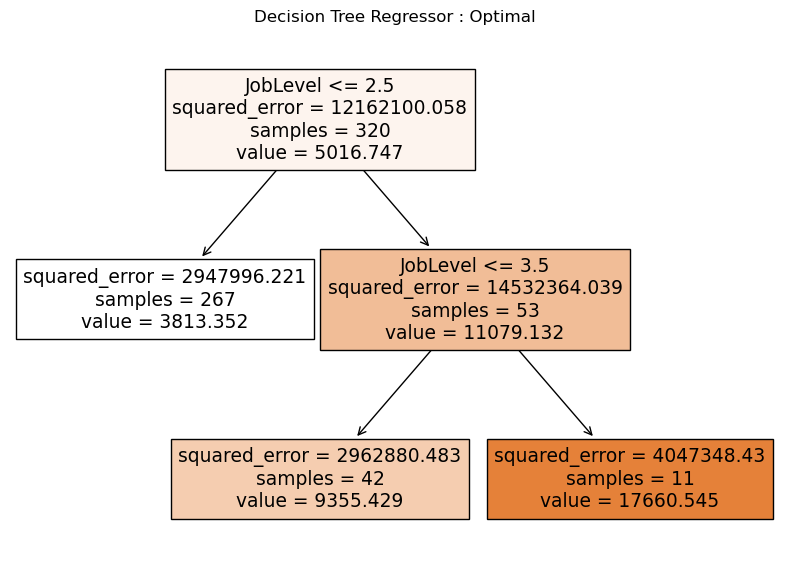

In [154]:
#REGRESSION 
# Plot decision tree for regression
plt.figure(figsize=(10, 7))
plot_tree(reg_tree, filled=True, feature_names=df_RG.columns)
plt.title("Decision Tree Regressor : Optimal ")
plt.show()
 